In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
animals = pd.read_csv(r'data\k-means-animals.csv')

In [14]:
animals.drop(['Region', 'Stage', 'Individual ID', 'Comments'], axis=1, inplace=True)

In [15]:
animals.dropna(inplace=True)

In [16]:
animals.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,44.047273,17.105455,201.312121,4215.833333,8.733382,-25.692045
std,5.446876,1.978632,13.962482,805.148981,0.551770,0.788226
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.500000,190.000000,3550.000000,8.299890,-26.323158
50%,44.900000,17.250000,197.000000,4050.000000,8.652405,-25.842775
75%,48.575000,18.600000,214.000000,4793.750000,9.172123,-25.064653
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [17]:
animals_std = pd.DataFrame(StandardScaler().fit_transform(animals))

In [18]:
animals_std.columns = animals.columns

In [19]:
animals_std.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,3.300000e+02,3.300000e+02,3.300000e+02,3.300000e+02,3.300000e+02,3.300000e+02
mean,1.269691e-15,1.818411e-15,-3.148996e-16,6.553680e-16,-9.904535e-16,2.644013e-15
std,1.001519e+00,1.001519e+00,1.001519e+00,1.001519e+00,1.001519e+00,1.001519e+00
min,-2.196748e+00,-2.027429e+00,-2.102537e+00,-1.885533e+00,-1.998755e+00,-1.685442e+00
25%,-8.361083e-01,-8.126283e-01,-8.114101e-01,-8.282249e-01,-7.868310e-01,-8.018904e-01
50%,1.567912e-01,7.316416e-02,-3.093053e-01,-2.062788e-01,-1.469808e-01,-1.915173e-01
75%,8.325145e-01,7.564898e-01,9.100922e-01,7.188661e-01,7.963586e-01,7.971636e-01
max,2.859684e+00,2.224375e+00,2.129490e+00,2.592479e+00,2.345216e+00,2.289459e+00


In [20]:
x = animals_std['Body Mass (g)']
y = animals_std['Flipper Length (mm)']

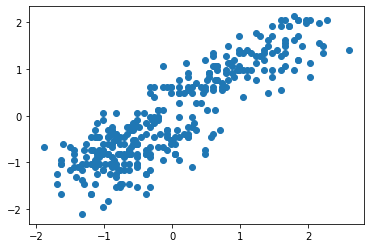

In [21]:
ax = plt.scatter(x, y)

In [22]:
dbm = DBSCAN(eps=1, min_samples=12).fit(animals_std)

In [23]:
clusters = dbm.labels_
print(clusters)

[-1 -1  0 -1  0 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1
  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1 -1 -1 -1  0  0  0  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 -1  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2

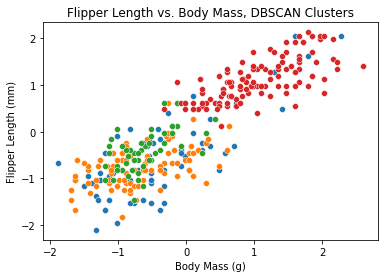

In [24]:
plt_df = animals_std
plt_df['Cluster'] = clusters
u_label = np.unique(clusters)
for i in u_label:
    temp_df = plt_df[plt_df['Cluster'] == i]
    ax = sns.scatterplot(x=temp_df['Body Mass (g)'], y=temp_df['Flipper Length (mm)'])
    ax.set(title='Flipper Length vs. Body Mass, DBSCAN Clusters')

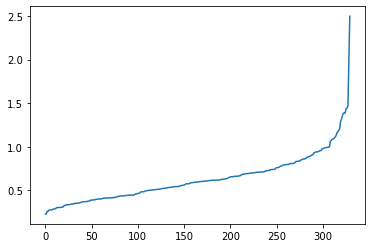

In [14]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
nearest_neighbors.fit(animals_std)
distances, indices = nearest_neighbors.kneighbors(animals_std)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.show()

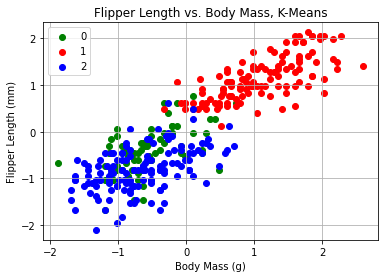

In [15]:
from sklearn.cluster import KMeans
km_models = {}

km = KMeans(n_clusters=3, random_state=0)
km.fit(animals_std)

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(animals_std)
    km_models[k] = km
color_dict = {0: 'green', 1: 'red', 2: 'blue', 3: 'black', 4: 'yellow', 5: 'pink', 6: 'brown', 7: 'purple', 8: 'orange'}

k = 3

animals_std['label'] = km_models[k].labels_

fig, ax = plt.subplots()

for i in range(k):
    ax.scatter(animals_std[animals_std['label'] == i]['Body Mass (g)'], animals_std[animals_std['label'] == i]['Flipper Length (mm)'], c=color_dict[i], label=i)

ax.legend(loc='upper left')
ax.grid(True)
ax.set(title='Flipper Length vs. Body Mass, K-Means', ylabel='Flipper Length (mm)', xlabel='Body Mass (g)')

plt.show()